In [62]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import pandas as pd
eps = np.finfo(float).eps
import sys
from matplotlib.pyplot import imshow

In [63]:
def sigmoid(data):
    return 1 / (1 + np.exp(np.negative(data)))

def calc_convolve(data, fltr):  
    res = np.multiply(data, fltr)
    return res

def calc_matmul(x,y):
    return np.matmul(x,y)

def ReLU(a):
    return a * (a > 0)

def calc_softmax(a):
    """Compute softmax values for each sets of scores in a."""
#     e_x = np.exp(x - np.max(x))
#     print 'a-',a
    e = np.exp(a )
#     print 'e^a=',e
    ans = e / np.sum(e)
    return ans


In [64]:
IMAGE_PATH = '/home/aishwarya/CSIS/SMAI/SMAI_assig/a-6/test_img.png'

FC_Convolution_Filter_Count = 120
POOLING_DIM = 2

def create_filters(layer_count):
    filter_depth = 0
    if layer_count == 1:
        filter_depth = 6
    elif layer_count == 2:
        filter_depth = 16
    elif layer_count == 3:
        filter_depth = FC_Convolution_Filter_Count
    else:
        print("Invalid layer count")

    filt_mtrx = np.random.randn(5,5, filter_depth)
    return filt_mtrx

def convolution(data, filter):
    data_row = data.shape[0]
    f_row, f_col, num_filters = filter.shape
    
    conv_result_dim = data_row - f_row + 1
    data_col = data.shape[1]
    data_channels = data.shape[2]
    
    i=0
    convolve_res = np.zeros((conv_result_dim, conv_result_dim, num_filters))

    # Breaking the data into sub-matrices of filter size and calling calc_convolve
    while i<num_filters:     
        for x_index in range(conv_result_dim):
            for y_index in range(conv_result_dim):
                ans=calc_convolve(data[x_index: x_index + f_row, y_index: y_index + f_col, i % data_channels],filter[:, :, i])
                convolve_res[x_index][y_index][i] = ans.sum()
        i+=1
#         im = Image.fromarray(convolve_result)
#         nm='test'+filter_index+'.png'
#         im.save(nm)

    return convolve_res

def imgshow(x,name):
    #x = x.transpose(2,0,1) 
    img = Image.fromarray(x,'RGB')
    img = img.resize((300,300))
    img.save(name)

def calc_weights_matrix(x,y):
#     or return np.random.randn(x,y)
    return np.random.uniform(low=-1, high=1, size=(x,y) )

def calc_max_pooling(data, sze=2):#, pool_size):
    data_row, data_col, result_layer = data.shape
    result_row= data_row // sze
    result_col= data_col // sze

    max_pool_result = np.zeros((result_row, result_col, result_layer))

    for l in range(result_layer):
        for r in range(0, data_row, 2):
            for c in range(0, data_col, 2):
                max_pool_result[r // sze][c // sze][l] = (data[r:r + sze, c:c + sze, l]).max()

    return max_pool_result

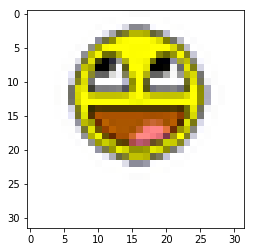

In [65]:
image = Image.open(IMAGE_PATH)
image = image.resize((32,32), Image.ANTIALIAS)
image.save('resized_img_32x32.png')

%matplotlib inline
imshow(np.asarray(image))

In [66]:
# if __name__ == '__main__':
def CNN(act_fun="sigmoid",pooling_type="max_pooling"):
    # Lenet Architectue
    # INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC(Conv) => RELU => FC

    
    image_array = np.array(image)
    print "Image new Dimensions: ", image_array.shape

    # -------------------------- First Convolution Block -------------------------------------------
    # Creating first layer filter
    # apply convolution on original image with 6 diffrent filters
    print '\n\nFirst convolution:'
    filter_matrix = create_filters(1)
    print "Filter Dimensions: ", filter_matrix.shape
    
    imgshow(filter_matrix,'1_filter_matrix.png')
    plt.imshow(filter_matrix[0])
    
    # Convolution at first layer
    convolve_res = convolution(image_array, filter_matrix)
    print "Convolution Result Dimensions:", convolve_res.shape
    imgshow(convolve_res[0],'1_conv_result[0].png')
    imgshow(convolve_res[1],'1_conv_result[1].png')
    imgshow(convolve_res[2],'1_conv_result[2].png')
    imgshow(convolve_res[3],'1_conv_result[3].png')
    imgshow(convolve_res[4],'1_conv_result[4].png')
    imgshow(convolve_res[5],'1_conv_result[5].png')
#     plt.imshow(convolve_res[0])
    
    if act_fun=="ReLU":
        # Applying ReLU activation function
        relu_result = ReLU(convolve_res)
        print "ReLU Result Dimensions:", relu_result.shape
        imgshow(relu_result,'1_relu_result.png')
    elif act_fun=="sigmoid":
        relu_result = sigmoid(convolve_res)
        print "sigmoid Result Dimensions:", relu_result.shape
        imgshow(relu_result,'1_sigmoid_result.png')


    if pooling_type=="max_pooling":
        # MaxPooling at the first convolution block
        pool_result = calc_max_pooling(relu_result, POOLING_DIM)
        imgshow(pool_result,'1_maxpool_result.png')
    print pool_result.shape , 'New image shape after 1st pooling'
    plt.imshow(pool_result[0])

    # --------------Second Convolution Block-----------------------------------------
    print '\n\nSecond convolution:'
    filter_matrix = create_filters(2)
    print "Filter Dimensions (2nd Block): ", filter_matrix.shape

    imgshow(filter_matrix,'2_filter_matrix.png')

    convolve_result = convolution(pool_result, filter_matrix)
    print "Convolution Result Dimensions (2nd Block):", convolve_result.shape

    imgshow(convolve_result,'2_conv_result.png')

    if act_fun=="ReLU":
        # Applying ReLU activation function
        relu_result = ReLU(convolve_result)
        print "ReLU Result Dimensions:", relu_result.shape
        imgshow(relu_result,'2_relu_result.png')
    elif act_fun=="sigmoid":
        relu_result = sigmoid(convolve_result)
        print "sigmoid Result Dimensions:", relu_result.shape
        imgshow(relu_result,'2_sigmoid_result.png')

        
#     print 'poolnng dim-',POOLING_DIM
    if pooling_type=="max_pooling":
        # MaxPooling at the first convolution block
        pool_result = calc_max_pooling(relu_result, POOLING_DIM)
        imgshow(pool_result,'2_maxpool_result.png')

    print pool_result.shape , 'New image shape after 2nd pooling'

    # -------------------- Convolution to give Fully Connected Layer-----------------------
    print '\nconvolution to give fully connected:'
    filter_matrix = create_filters(3)
    print "Filter Dimensions (3rd Block): ", filter_matrix.shape

    imgshow(filter_matrix,'3_filter_matrix.png')

    convolve_result = convolution(pool_result, filter_matrix)
    print "Convolution Result Dimensions (2nd Block):", convolve_result.shape

    imgshow(convolve_result,'3_conv_result.png')

    if act_fun=="ReLU":
        # Applying ReLU activation function
        relu_result = ReLU(convolve_result)
        print "ReLU Result Dimensions:", relu_result.shape
        imgshow(relu_result,'3_relu_result.png')
    elif act_fun=="sigmoid":
        relu_result = sigmoid(convolve_result)
        print "sigmoid Result Dimensions:", relu_result.shape
        imgshow(relu_result,'3_sigmoid_result.png')

    
    print relu_result.shape , 'New image shape'
#     print 'pool0-',relu_result[0].shape
    
    print '\n\nFully Connected Layer-----------------------[forward propagation]------------------------'
    # -----------Layer 2- 84-----------
    input_mat=relu_result
    weight_input_hidden=calc_weights_matrix(120,84)

    hiddn_layer2=np.dot(input_mat, weight_input_hidden)
    result1=sigmoid(hiddn_layer2)
    


    print 'FC output layer 1 shape-',result1.shape

    # -----------layer 3 -10-----------
    weight_input_hidden=calc_weights_matrix(84,10)
    output_layer=calc_matmul(result1, weight_input_hidden)
    if act_fun=="ReLU":
        # Applying ReLU activation function
        output_layer=ReLU(output_layer)
        
    elif act_fun=="sigmoid":
        output_layer=sigmoid(output_layer)
    
    print '\nFC output layer 2 shape-',output_layer.shape
    soft_max_op=calc_softmax(output_layer[0])
#     softmax_result = calc_softmax(output_nn[0, 0, :])
#     print(softmax_result)
#     print '\noutput layer 3 shape-',soft_max_op.shape
    print '\nSOFTMAX:output -',soft_max_op[0,:]

Image new Dimensions:  (32, 32, 4)


First convolution:
Filter Dimensions:  (5, 5, 6)
Convolution Result Dimensions: (28, 28, 6)
ReLU Result Dimensions: (28, 28, 6)
(14, 14, 6) New image shape after 1st pooling


Second convolution:
Filter Dimensions (2nd Block):  (5, 5, 16)
Convolution Result Dimensions (2nd Block): (10, 10, 16)
ReLU Result Dimensions: (10, 10, 16)
(5, 5, 16) New image shape after 2nd pooling

convolution to give fully connected:
Filter Dimensions (3rd Block):  (5, 5, 120)
Convolution Result Dimensions (2nd Block): (1, 1, 120)
ReLU Result Dimensions: (1, 1, 120)
(1, 1, 120) New image shape


Fully Connected Layer-----------------------[forward propagation]------------------------
FC output layer 1 shape- (1, 1, 84)

FC output layer 2 shape- (1, 1, 10)

SOFTMAX:output - [ 0.0040791   0.0040791   0.0040791   0.74208166  0.0040791   0.11819261
  0.01269768  0.08496555  0.01287573  0.01287037]


/home/aishwarya/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


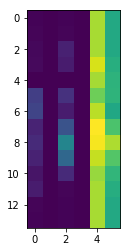

In [67]:
act_fun="ReLU"
CNN(act_fun,pooling_type="max_pooling")